<a href="https://colab.research.google.com/github/Ashu156/Neural-time-series-analysis-LFP/blob/main/event_related_desynchronization_synchronization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mne

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import pandas as pd
import seaborn as sns
import mne
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
from mne.time_frequency import tfr_multitaper
from mne.stats import permutation_cluster_1samp_test as pcluster_test

     |████████████████████████████████| 7.7 MB 3.6 MB/s 
  Created wheel for mne: filename=mne-1.0.1-py3-none-any.whl size=7542700 sha256=d1163e25e355cbca3410e588b3d2be9dbec0feb53ba07a1f8a143c86a327518f
  Stored in directory: /root/.cache/pip/wheels/b1/16/e2/46ea7fb2215890e506fa85526ccbc2145663ad12c356d04c35
Successfully built mne


In [2]:
# First, we load and preprocess the data. We use runs 6, 10, and 14 from
# subject 1 (these runs contains hand and feet motor imagery).
fnames = eegbci.load_data(subject=1, runs=(6, 10, 14))
raw = concatenate_raws([read_raw_edf(f, preload=True) for f in fnames])

raw.rename_channels(lambda x: x.strip('.'))  # remove dots from channel names

events, _ = mne.events_from_annotations(raw, event_id=dict(T1=2, T2=3))

Using default location ~/mne_data for EEGBCI...
Creating ~/mne_data


Do you want to set the path:
    /root/mne_data
as the default EEGBCI dataset path in the mne-python config [y]/n? y
Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T1', 'T2']


In [7]:
# Now we can create 5s epochs around events of interest.
tmin, tmax = -1, 4
event_ids = dict(hands=2, feet=3)  # map event IDs to tasks

epochs = mne.Epochs(raw, events, event_ids, tmin - 0.5, tmax + 0.5,
                    picks=('C3', 'Cz', 'C4'), baseline=None, preload=True)

Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 45 events and 961 original time points ...
0 bad epochs dropped


In [11]:
# Here we set suitable values for computing ERDS maps.
freqs = np.arange(2, 36)  # frequencies from 2-35Hz
vmin, vmax = -1, 1.5  # set min and max ERDS values in plot
baseline = [-1, 0]  # baseline interval (in s)
cnorm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)  # min, center & max ERDS

kwargs = dict(n_permutations=100, step_down_p=0.05, seed=1,
              buffer_size=None, out_type='mask')  # for cluster test

Not setting metadata
Applying baseline correction (mode: percent)
Using a threshold of 1.724718
stat_fun(H1): min=-8.523637 max=3.197747
Running initial clustering
Found 78 clusters
Permuting 99 times...


  0%|          |  : 0/99 [00:00<?,       ?it/s]

Computing cluster p-values
Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
Done.
Using a threshold of -1.724718
stat_fun(H1): min=-8.523637 max=3.197747
Running initial clustering
Found 65 clusters
Permuting 99 times...


  0%|          |  : 0/99 [00:00<?,       ?it/s]

Computing cluster p-values
Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations
Permuting 99 times...


  0%|          |  : 0/99 [00:00<?,       ?it/s]

Computing cluster p-values
Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Done.
No baseline correction applied
Using a threshold of 1.724718
stat_fun(H1): min=-4.573067 max=3.687727
Running initial clustering
Found 85 clusters
Permuting 99 times...


  0%|          |  : 0/99 [00:00<?,       ?it/s]

Computing cluster p-values
Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations
Permuting 99 times...


  0%|          |  : 0/99 [00:00<?,       ?it/s]

Computing cluster p-values
Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Done.
Using a threshold of -1.724718
stat_fun(H1): min=-4.573067 max=3.687727
Running initial clustering
Found 57 clusters
Permuting 99 times...


  0%|          |  : 0/99 [00:00<?,       ?it/s]

Computing cluster p-values
Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
Done.
No baseline correction applied
Using a threshold of 1.724718
stat_fun(H1): min=-6.599131 max=3.329547
Running initial clustering
Found 64 clusters
Permuting 99 times...


  0%|          |  : 0/99 [00:00<?,       ?it/s]

Computing cluster p-values
Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
Done.
Using a threshold of -1.724718
stat_fun(H1): min=-6.599131 max=3.329547
Running initial clustering
Found 64 clusters
Permuting 99 times...


  0%|          |  : 0/99 [00:00<?,       ?it/s]

Computing cluster p-values
Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
Done.
No baseline correction applied


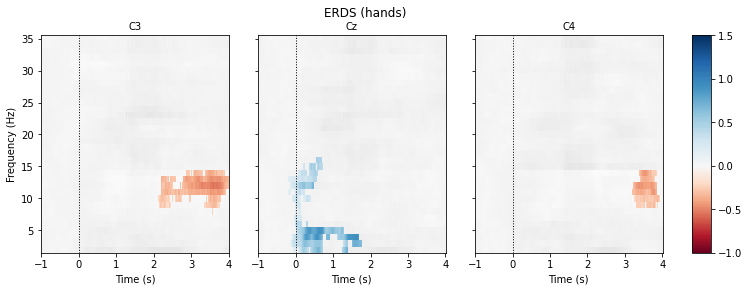

Using a threshold of 1.713872
stat_fun(H1): min=-3.687815 max=3.369164
Running initial clustering
Found 66 clusters
Permuting 99 times...


  0%|          |  : 0/99 [00:00<?,       ?it/s]

Computing cluster p-values
Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
Done.
Using a threshold of -1.713872
stat_fun(H1): min=-3.687815 max=3.369164
Running initial clustering
Found 75 clusters
Permuting 99 times...


  0%|          |  : 0/99 [00:00<?,       ?it/s]

Computing cluster p-values
Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
Done.
No baseline correction applied
Using a threshold of 1.713872
stat_fun(H1): min=-5.046259 max=5.406477
Running initial clustering
Found 98 clusters
Permuting 99 times...


  0%|          |  : 0/99 [00:00<?,       ?it/s]

Computing cluster p-values
Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations
Permuting 99 times...


  0%|          |  : 0/99 [00:00<?,       ?it/s]

Computing cluster p-values
Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Done.
Using a threshold of -1.713872
stat_fun(H1): min=-5.046259 max=5.406477
Running initial clustering
Found 66 clusters
Permuting 99 times...


  0%|          |  : 0/99 [00:00<?,       ?it/s]

Computing cluster p-values
Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
Done.
No baseline correction applied
Using a threshold of 1.713872
stat_fun(H1): min=-5.964817 max=4.078953
Running initial clustering
Found 92 clusters
Permuting 99 times...


  0%|          |  : 0/99 [00:00<?,       ?it/s]

Computing cluster p-values
Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations
Permuting 99 times...


  0%|          |  : 0/99 [00:00<?,       ?it/s]

Computing cluster p-values
Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Done.
Using a threshold of -1.713872
stat_fun(H1): min=-5.964817 max=4.078953
Running initial clustering
Found 52 clusters
Permuting 99 times...


  0%|          |  : 0/99 [00:00<?,       ?it/s]

Computing cluster p-values
Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
Done.
No baseline correction applied


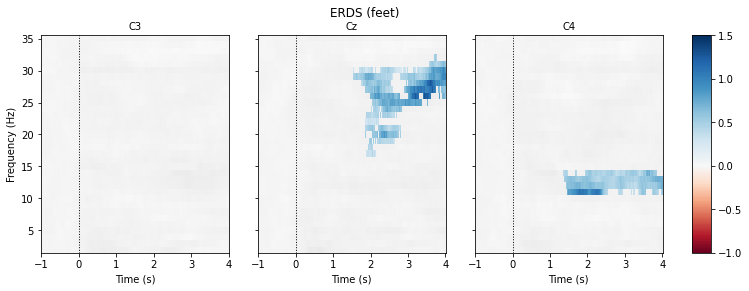

In [14]:
# Finally, we perform time/frequency decomposition over all epochs.
tfr = tfr_multitaper(epochs, freqs=freqs, n_cycles=freqs, use_fft=True,
                     return_itc=False, average=False, decim=2)
tfr.crop(tmin, tmax).apply_baseline(baseline, mode="percent")

for event in event_ids:
    # select desired epochs for visualization
    tfr_ev = tfr[event]
    fig, axes = plt.subplots(1, 4, figsize=(12, 4),
                             gridspec_kw={"width_ratios": [10, 10, 10, 1]})
    for ch, ax in enumerate(axes[:-1]):  # for each channel
        # positive clusters
        _, c1, p1, _ = pcluster_test(tfr_ev.data[:, ch], tail=1, **kwargs)
        # negative clusters
        _, c2, p2, _ = pcluster_test(tfr_ev.data[:, ch], tail=-1, **kwargs)

        # note that we keep clusters with p <= 0.05 from the combined clusters
        # of two independent tests; in this example, we do not correct for
        # these two comparisons
        c = np.stack(c1 + c2, axis=2)  # combined clusters
        p = np.concatenate((p1, p2))  # combined p-values
        mask = c[..., p <= 0.05].any(axis=-1)

        # plot TFR (ERDS map with masking)
        tfr_ev.average().plot([ch], cmap="RdBu", cnorm=cnorm, axes=ax,
                              colorbar=False, show=False, mask=mask,
                              mask_style="mask")

        ax.set_title(epochs.ch_names[ch], fontsize=10)
        ax.axvline(0, linewidth=1, color="black", linestyle=":")  # event
        if ch != 0:
            ax.set_ylabel("")
            ax.set_yticklabels("")
    fig.colorbar(axes[0].images[-1], cax=axes[-1]).ax.set_yscale("linear")
    fig.suptitle(f"ERDS ({event})")
    plt.show()

Converting "condition" to "category"...
Converting "epoch" to "category"...
Converting "freq" to "category"...
Converting "channel" to "category"...
Converting "ch_type" to "category"...


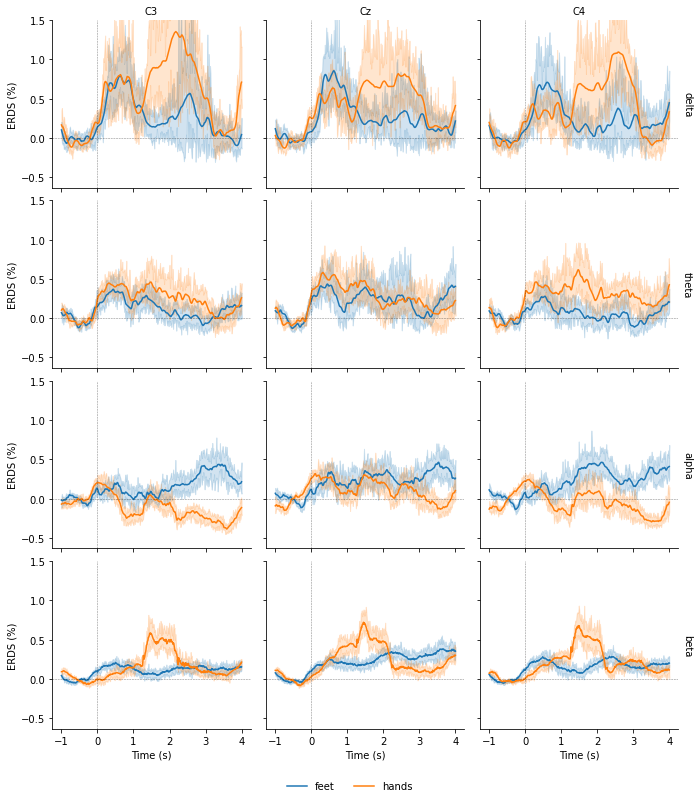

In [15]:
# Similar to `~mne.Epochs` objects, we can also export data from
# `~mne.time_frequency.EpochsTFR` and `~mne.time_frequency.AverageTFR` objects
# to a :class:`Pandas DataFrame <pandas.DataFrame>`. By default, the `time`
# column of the exported data frame is in milliseconds. Here, to be consistent
# with the time-frequency plots, we want to keep it in seconds, which we can
# achieve by setting ``time_format=None``:

df = tfr.to_data_frame(time_format=None)
df.head()

# %%
# This allows us to use additional plotting functions like
# :func:`seaborn.lineplot` to plot confidence bands:

df = tfr.to_data_frame(time_format=None, long_format=True)

# Map to frequency bands:
freq_bounds = {'_': 0,
               'delta': 3,
               'theta': 7,
               'alpha': 13,
               'beta': 35,
               'gamma': 140}
df['band'] = pd.cut(df['freq'], list(freq_bounds.values()),
                    labels=list(freq_bounds)[1:])

# Filter to retain only relevant frequency bands:
freq_bands_of_interest = ['delta', 'theta', 'alpha', 'beta']
df = df[df.band.isin(freq_bands_of_interest)]
df['band'] = df['band'].cat.remove_unused_categories()

# Order channels for plotting:
df['channel'] = df['channel'].cat.reorder_categories(('C3', 'Cz', 'C4'),
                                                     ordered=True)

g = sns.FacetGrid(df, row='band', col='channel', margin_titles=True)
g.map(sns.lineplot, 'time', 'value', 'condition', n_boot=10)
axline_kw = dict(color='black', linestyle='dashed', linewidth=0.5, alpha=0.5)
g.map(plt.axhline, y=0, **axline_kw)
g.map(plt.axvline, x=0, **axline_kw)
g.set(ylim=(None, 1.5))
g.set_axis_labels("Time (s)", "ERDS (%)")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.add_legend(ncol=2, loc='lower center')
g.fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.08)

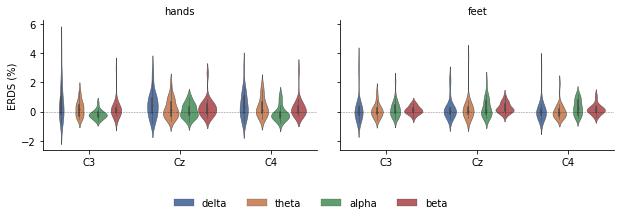

In [21]:
# Having the data as a DataFrame also facilitates subsetting,
# grouping, and other transforms.
# Here, we use seaborn to plot the average ERDS in the motor imagery interval
# as a function of frequency band and imagery condition:

df_mean = (df.query('time > 1')
             .groupby(['condition', 'epoch', 'band', 'channel'])[['value']]
             .mean()
             .reset_index())

g = sns.FacetGrid(df_mean, col='condition', col_order=['hands', 'feet'],
                  margin_titles=True)
g = (g.map(sns.violinplot, 'channel', 'value', 'band', n_boot=10,
           palette='deep', order=['C3', 'Cz', 'C4'],
           hue_order=freq_bands_of_interest,
           linewidth=0.5).add_legend(ncol=4, loc='lower center'))

g.map(plt.axhline, **axline_kw)
g.set_axis_labels("", "ERDS (%)")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.3)

In [25]:
from mne import io
from mne.datasets import sample
from mne.minimum_norm import read_inverse_operator, source_induced_power

Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
320 events found
Event IDs: [ 1  2  3  4  5 32]
Reading inverse operator decomposition from /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis-meg-oct-6-meg-inv.fif...
    Reading inverse operator info...
    [done]
    Reading inverse operator decomposition...
    [done]
    305 x 305 full covariance (kind = 1) found.
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Noise covariance matrix read.
    22494 x 22494 diagonal covariance (kind = 2) found.
    Source covariance matrix read.
    22494 x 22494 diagonal covariance (kind = 6) found.
    Orientation prior

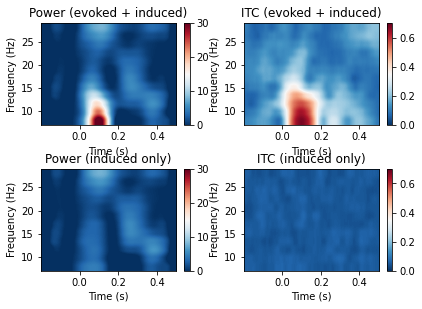

In [26]:
# Set parameters
data_path = sample.data_path()
meg_path = data_path / 'MEG' / 'sample'
raw_fname = meg_path / 'sample_audvis_raw.fif'
fname_inv = meg_path / 'sample_audvis-meg-oct-6-meg-inv.fif'
label_name = 'Aud-rh'
fname_label = meg_path / 'labels' / f'{label_name}.label'

tmin, tmax, event_id = -0.2, 0.5, 2

# Setup for reading the raw data
raw = io.read_raw_fif(raw_fname)
events = mne.find_events(raw, stim_channel='STI 014')
inverse_operator = read_inverse_operator(fname_inv)

include = []
raw.info['bads'] += ['MEG 2443', 'EEG 053']  # bads + 2 more

# Picks MEG channels
picks = mne.pick_types(raw.info, meg=True, eeg=False, eog=True,
                       stim=False, include=include, exclude='bads')
reject = dict(grad=4000e-13, mag=4e-12, eog=150e-6)

# Load epochs
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, picks=picks,
                    baseline=(None, 0), reject=reject,
                    preload=True)

# Compute a source estimate per frequency band including and excluding the
# evoked response
freqs = np.arange(7, 30, 2)  # define frequencies of interest
label = mne.read_label(fname_label)
n_cycles = freqs / 3.  # different number of cycle per frequency

# subtract the evoked response in order to exclude evoked activity
epochs_induced = epochs.copy().subtract_evoked()

plt.close('all')

for ii, (this_epochs, title) in enumerate(zip([epochs, epochs_induced],
                                              ['evoked + induced',
                                               'induced only'])):
    # compute the source space power and the inter-trial coherence
    power, itc = source_induced_power(
        this_epochs, inverse_operator, freqs, label, baseline=(-0.1, 0),
        baseline_mode='percent', n_cycles=n_cycles, n_jobs=1)

    power = np.mean(power, axis=0)  # average over sources
    itc = np.mean(itc, axis=0)  # average over sources
    times = epochs.times

    ##########################################################################
    # View time-frequency plots
    plt.subplots_adjust(0.1, 0.08, 0.96, 0.94, 0.2, 0.43)
    plt.subplot(2, 2, 2 * ii + 1)
    plt.imshow(20 * power,
               extent=[times[0], times[-1], freqs[0], freqs[-1]],
               aspect='auto', origin='lower', vmin=0., vmax=30., cmap='RdBu_r')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title('Power (%s)' % title)
    plt.colorbar()

    plt.subplot(2, 2, 2 * ii + 2)
    plt.imshow(itc,
               extent=[times[0], times[-1], freqs[0], freqs[-1]],
               aspect='auto', origin='lower', vmin=0, vmax=0.7,
               cmap='RdBu_r')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title('ITC (%s)' % title)
    plt.colorbar()

plt.show()